# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install missingno
import missingno as msno



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [3]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('Dataset_Arqueologico_Egipto_Expandido.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())

Time=df['Time Period'].unique()
Timenum= df['Time Period'].nunique()
Material=df['Material_Composition'].unique()
Script=df['Script Detected'].unique()
print(Time)
print(Timenum)
print(Material)
print(Script)

Number of samples: 500
Number of features: 11
Example data:
    Site ID   Latitude  Longitude                Time Period  \
0  EGX-0001  25.979264  33.087532         Periodo Ptolemaico   
1  EGX-0002  30.328797  35.666532  Primer Período Intermedio   
2  EGX-0003  26.385666  35.623492              Antiguo Reino   
3  EGX-0004  31.207514  35.624005         Periodo Ptolemaico   
4  EGX-0005  24.557906  30.521296  Primer Período Intermedio   

  Material_Composition Script Detected  AI Prediction Score  \
0               Caliza        Demótico            66.501482   
1               Bronce          Griego            90.026677   
2                 Yeso           Copto            73.468803   
3          Oro, Bronce        Demótico            80.710058   
4         Bronce, Yeso     Jeroglífico            91.950490   

   Human Activity Index  Climate Change Impact  Sonar Radar Detection  \
0              4.879290               4.338895              77.865637   
1              9.321455       

In [10]:


df['Ptolomaer'] = np.where(df['Time Period'] != 'Periodo Ptolemaico', 0, 1)
df['Erste Zwischenzeit'] = np.where(df['Time Period'] != 'Primer Período Intermedio', 0, 1)
df['Antike'] = np.where(df['Time Period'] != 'Antiguo Reino', 0, 1)
df['Spätzeit'] = np.where(df['Time Period'] != 'Periodo Tardío', 0, 1)
df['Dritte Zwischenzeit'] = np.where(df['Time Period'] != 'Tercer Período Intermedio', 0, 1)
df['Neues Reich'] = np.where(df['Time Period'] != 'Imperio Nuevo', 0, 1)
df['Zweite Zwischenzeit'] = np.where(df['Time Period'] != 'Segundo Período Intermedio', 0, 1)
df['Römisch'] = np.where(df['Time Period'] != 'Periodo Romano', 0, 1)
df['Mittleres Reich'] = np.where(df['Time Period'] != 'Imperio Medio', 0, 1)

#str.contains Caliza Bronce Yeso Oro Madera Arenisca Adobe Granito Ladrillo
df['Bronce'] = df.Material_Composition.str.contains ('Bronce',regex=False) 
df['Bronze']=np.where(df['Bronce'] != True, 0, 1)
df['Caliza'] = df.Material_Composition.str.contains ('Caliza',regex=False) 
df['Kalkstein']=np.where(df['Caliza'] != True, 0, 1)
df['Yeso'] = df.Material_Composition.str.contains ('Yeso',regex=False) 
df['Gips']=np.where(df['Yeso'] != True, 0, 1)
df['Oro'] = df.Material_Composition.str.contains ('Oro',regex=False) 
df['Gold']=np.where(df['Oro'] != True, 0, 1)
df['Madera'] = df.Material_Composition.str.contains ('Madera',regex=False) 
df['Holz']=np.where(df['Madera'] != True, 0, 1)
df['Arenisca'] = df.Material_Composition.str.contains ('Arenisca',regex=False) 
df['Sandstein']=np.where(df['Arenisca'] != True, 0, 1)
df['Adobe'] = df.Material_Composition.str.contains ('Adobe',regex=False) 
df['Lehm']=np.where(df['Adobe'] != True, 0, 1)
df['Granito'] = df.Material_Composition.str.contains ('Granito',regex=False) 
df['Granit']=np.where(df['Granito'] != True, 0, 1)
df['Ladrillo'] = df.Material_Composition.str.contains ('Ladrillo',regex=False) 
df['Ziegel']=np.where(df['Ladrillo'] != True, 0, 1)


df['Demotisch'] = np.where(df['Script Detected'] != 'Demótico', 0, 1)
df['Griechisch'] = np.where(df['Script Detected'] != 'Griego', 0, 1)
df['Koptisch'] = np.where(df['Script Detected'] != 'Copto', 0, 1)
df['Hieroglyphen'] = np.where(df['Script Detected'] != 'Jeroglífico', 0, 1)
df['Keilschrift'] = np.where(df['Script Detected'] != 'Cuneiforme', 0, 1)
df['Hieratisch'] = np.where(df['Script Detected'] != 'Hierático', 0, 1)
print(df.head())
#data['label'] = data.target.where(data.target != 4, 1)

    Site ID   Latitude  Longitude                Time Period  \
0  EGX-0001  25.979264  33.087532         Periodo Ptolemaico   
1  EGX-0002  30.328797  35.666532  Primer Período Intermedio   
2  EGX-0003  26.385666  35.623492              Antiguo Reino   
3  EGX-0004  31.207514  35.624005         Periodo Ptolemaico   
4  EGX-0005  24.557906  30.521296  Primer Período Intermedio   

  Material_Composition Script Detected  AI Prediction Score  \
0               Caliza        Demótico            66.501482   
1               Bronce          Griego            90.026677   
2                 Yeso           Copto            73.468803   
3          Oro, Bronce        Demótico            80.710058   
4         Bronce, Yeso     Jeroglífico            91.950490   

   Human Activity Index  Climate Change Impact  Sonar Radar Detection  ...  \
0              4.879290               4.338895              77.865637  ...   
1              9.321455               1.335763              64.012870  ...   
2 

In [17]:
# CSV-Datei speichern
df_final=df.drop(['Site ID','Time Period','Material_Composition', 'Script Detected','Caliza', 'Bronce', 'Yeso', 'Oro', 'Madera', 'Arenisca', 'Adobe', 'Granito', 'Ladrillo'], axis=1)
output_file = "/workspaces/Machine_learning_tensorflow/1_DatasetCharacteristics/Data_final.csv"
df_final.to_csv(output_file, index=False)

print(f"Daten erfolgreich erweitert und in {output_file} gespeichert.")

Daten erfolgreich erweitert und in /workspaces/Machine_learning_tensorflow/1_DatasetCharacteristics/Data_final.csv gespeichert.


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


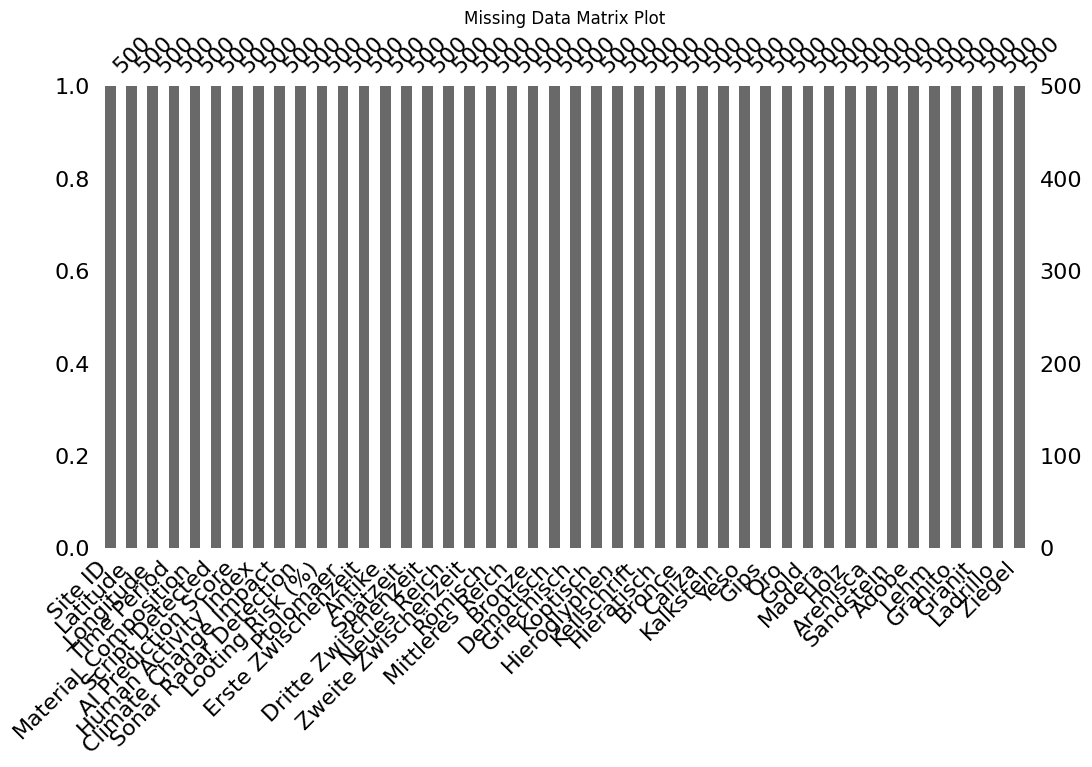

(44,)

In [11]:
# Check for missing values
msno.bar(df, figsize=(12,6))
plt.title('Missing Data Matrix Plot')
plt.show()
missing_values = df.isnull().sum()
missing_values.shape


In [ ]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here: There is no missing values


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


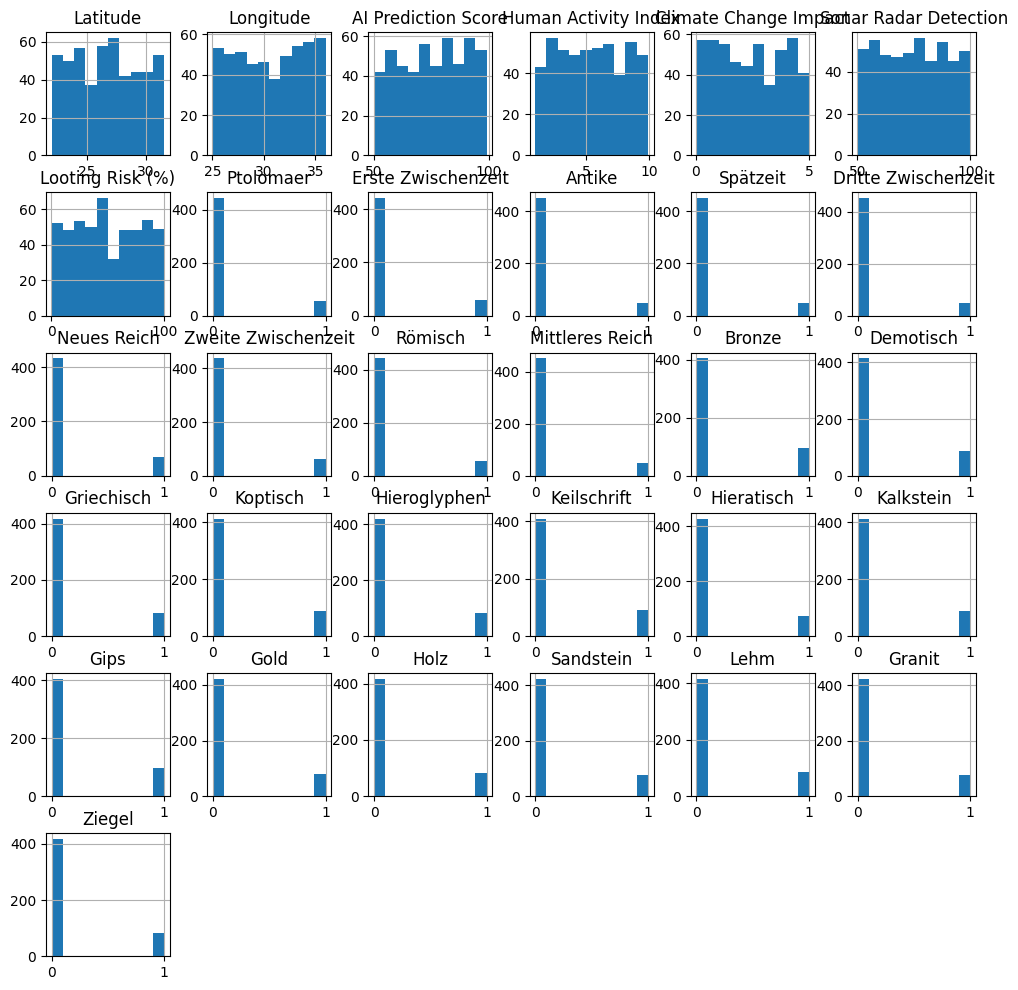

In [12]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


<Axes: xlabel='Human Activity Index', ylabel='count'>

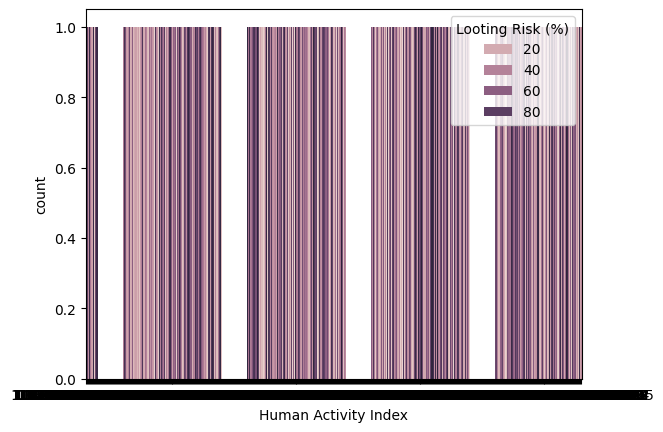

In [13]:
# Example: Checking for class imbalance in a classification problem
sns.countplot(x='Human Activity Index', data=df, hue='Looting Risk (%)')

# Your code to investigate possible biases goes here
# No biases found, but the problem is, that the dataset is already giving the places of potential dig sites so only the positives and not all the data. 
# The data points with sonar scores below 50 and ai scores below 50 are already excluded
#-> synthetic data with 'negatives' and training the ai to find the original data? 
#-> model of normality ( one-class or unary classification) or novelty and outlier detection?


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


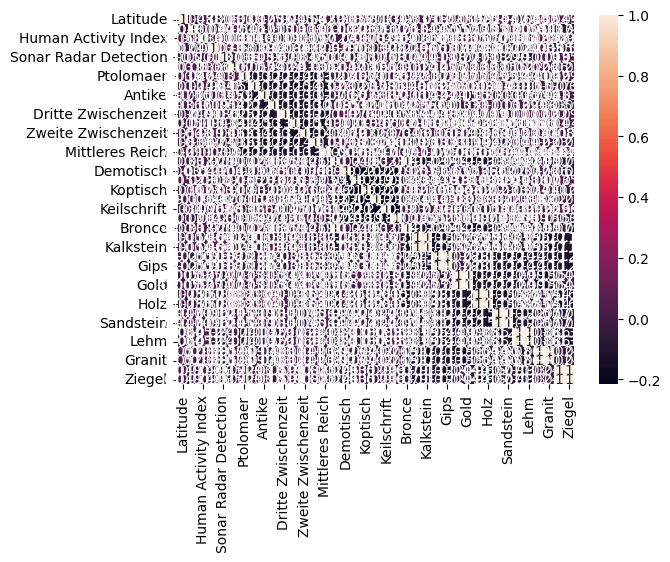

In [15]:
# Example: Plotting a heatmap to show feature correlations
df_num=df.drop(['Site ID','Time Period','Material_Composition', 'Script Detected',  'AI Prediction Score'], axis=1)
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
